In [1]:
from config import data_path
import pickle
from svi_calibrator_slsqp import SVICalibrator as SVI1
from plot_curves import plot_single_fit
from workflow import multi_fit_analysis

In [2]:
with open(f"{data_path}/data_packs.pkl", "rb") as f:
    data_packs = pickle.load(f)

Example test for date 2025-04-08, expiry 2025-04-11

In [3]:
date = '2025-04-08'
expiry = '2025-04-11'
dict_expiry = data_packs[date][expiry]

Calibrating single maturity


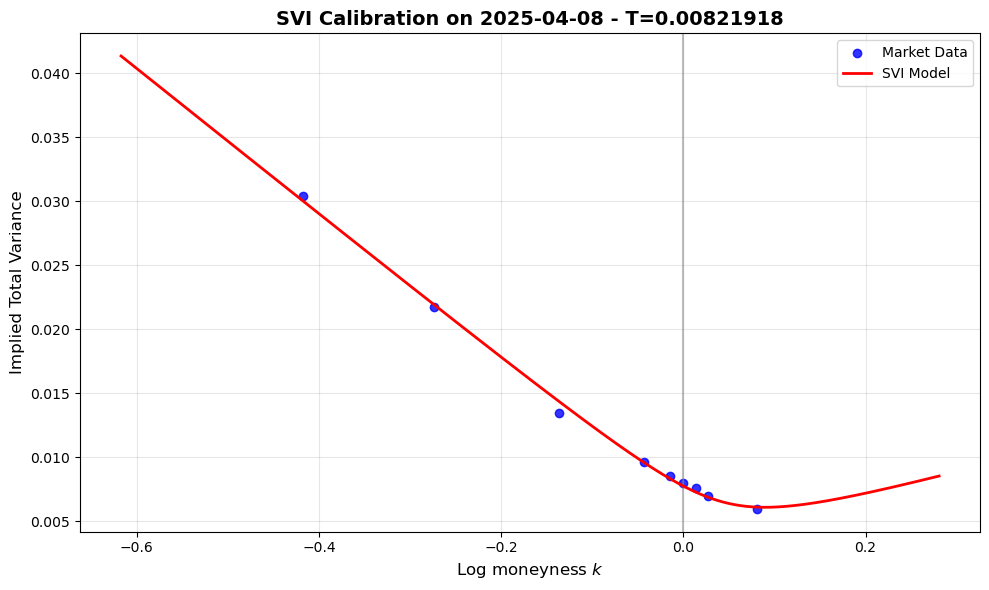

Calibrated parameters:
a = 0.003367
b = 0.038390
rho = -0.488301
m = 0.044277
sigma = 0.081332
Minimum g value: 0.312191 (should be > 0 for no butterfly arbitrage)


In [4]:
# Initialize the calibrator
calibrator = SVI1(epsilon=1e-6, verbose=False)
# Single maturity calibration
print("Calibrating single maturity")
params1 = calibrator.robust_calibration(dict_expiry['k'],dict_expiry['w'].values)
plot_single_fit(
    calibrator, 
    dict_expiry['k'],
    dict_expiry['w'].values, 
    params=params1, 
    title=f"SVI Calibration on {date} - T={dict_expiry['T']:.8f}"
)

Example test for date 2025-04-08, multiple maturities

Calibrating multiply maturities


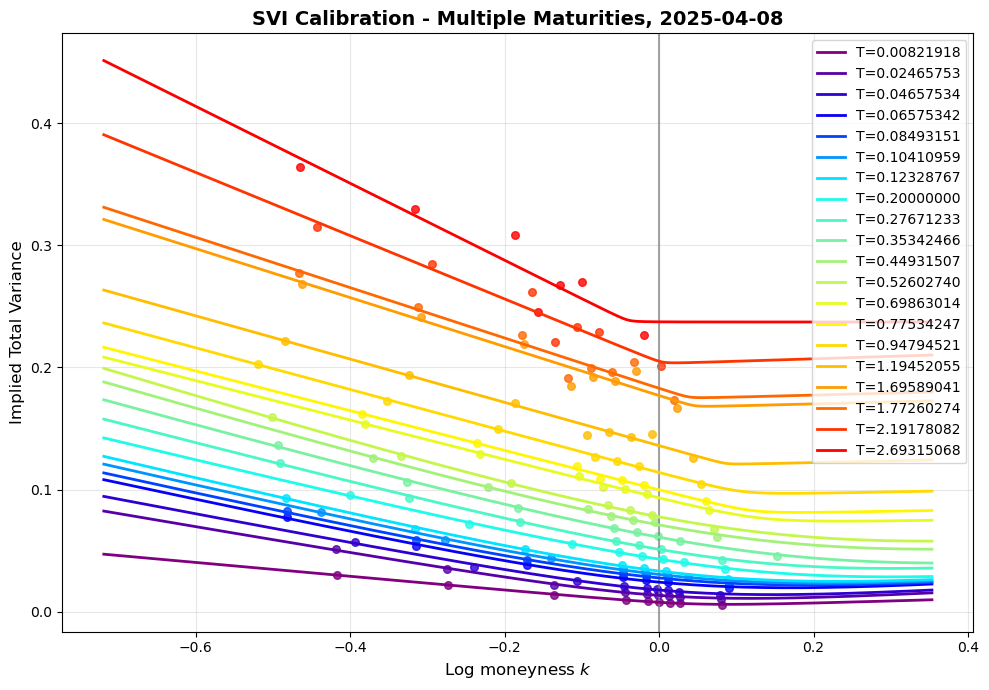

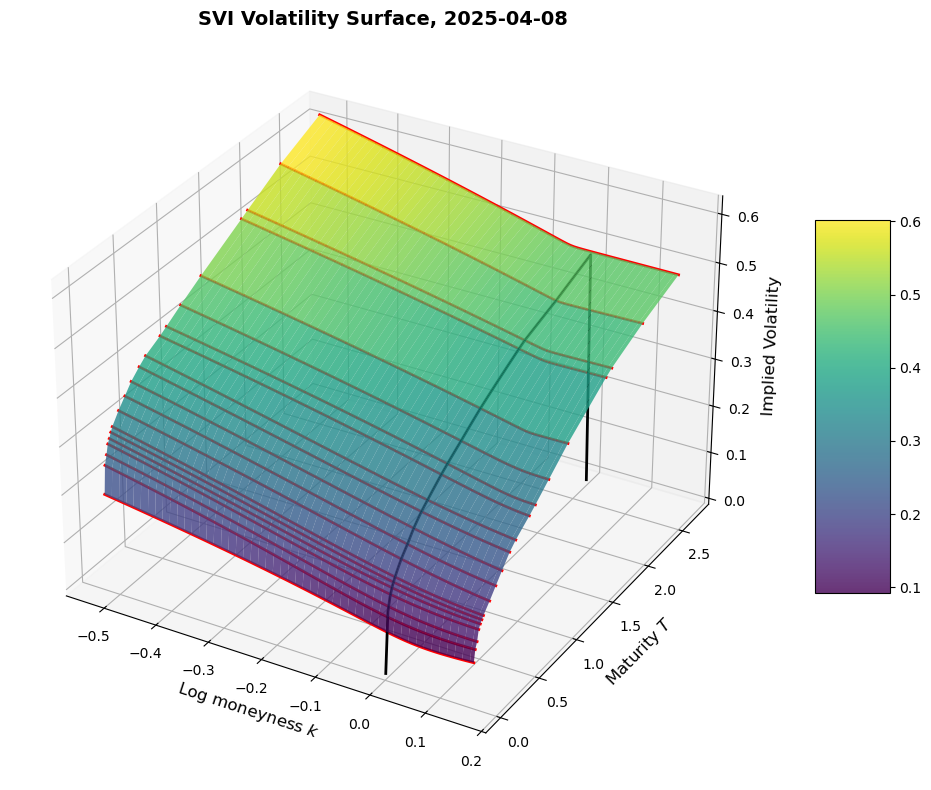


Calibrated SVI Parameters:
                   a         b       rho         m     sigma
Maturity                                                    
0.00821918  0.003367  0.038390 -0.488301  0.044278  0.081332
0.02465753  0.000010  0.073454 -0.491623  0.020116  0.171604
0.04657534  0.000010  0.082028 -0.495780  0.033726  0.197172
0.06575342  0.000010  0.093191 -0.499152  0.029035  0.243778
0.08493151  0.000010  0.095652 -0.501729  0.042381  0.264893
0.10410959  0.000526  0.099109 -0.504753  0.057927  0.267577
0.12328767  0.001062  0.102063 -0.507318  0.071047  0.270887
0.20000000  0.004506  0.102993 -0.517238  0.134786  0.273195
0.27671233  0.009667  0.110531 -0.517639  0.135338  0.273035
0.35342466  0.006390  0.118088 -0.524713  0.169705  0.332810
0.44931507  0.015930  0.124248 -0.524970  0.149131  0.333773
0.52602740  0.021032  0.129487 -0.525414  0.142108  0.334041
0.69863014  0.071091  0.087473 -0.851070  0.127691  0.067625
0.77534247  0.079644  0.087942 -0.851884  0.120827  0.036

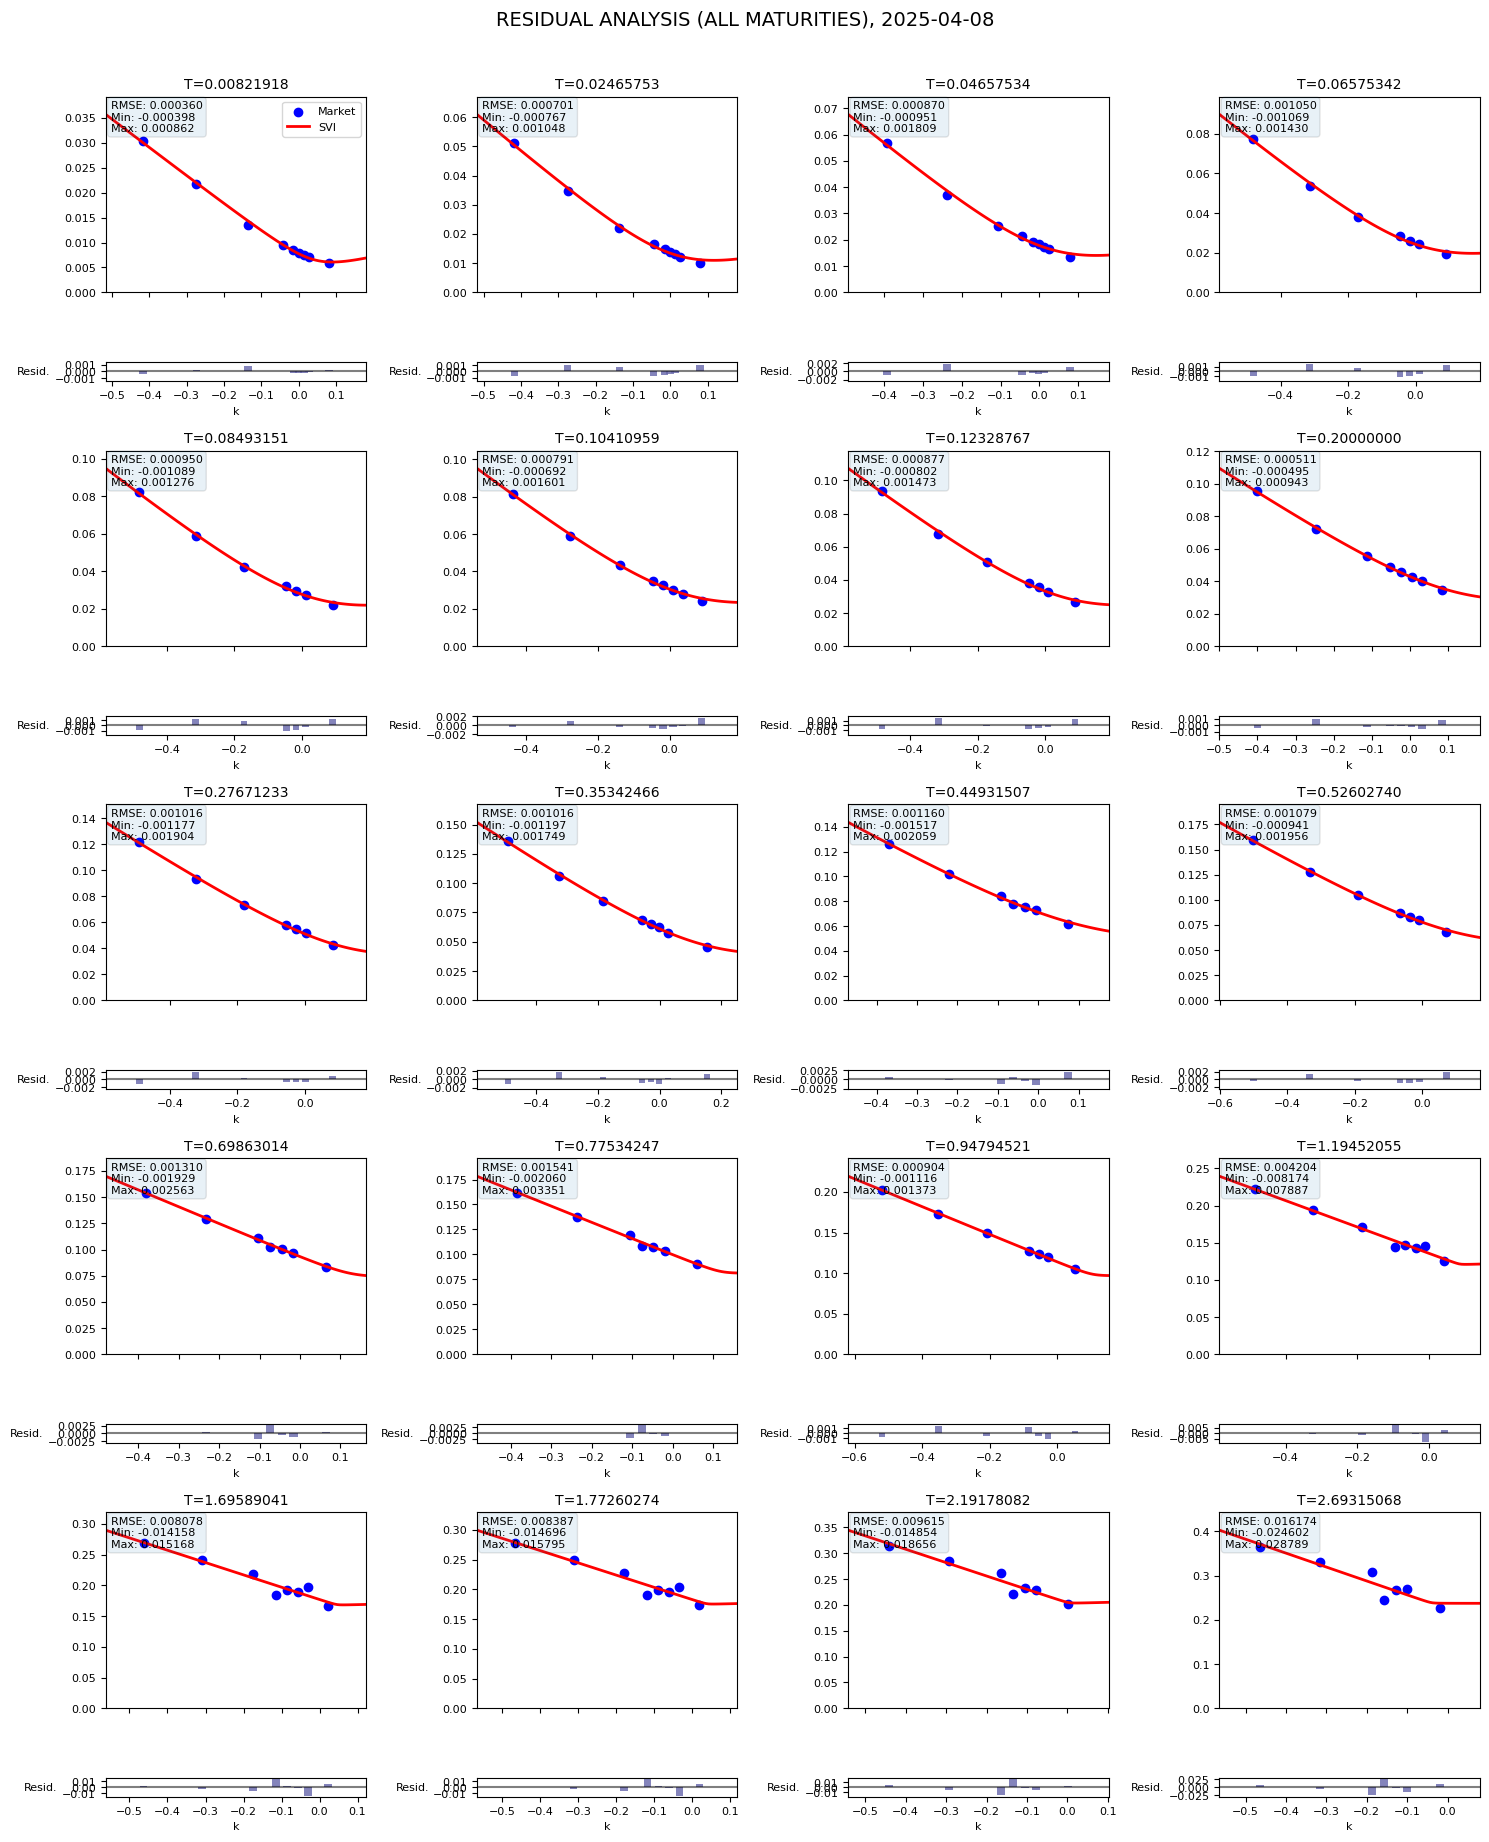

In [5]:
multi_fit_analysis(date='2025-04-08', method='slsqp', epsilon=1e-3, verbose=False, show=True)

Calibrating multiply maturities


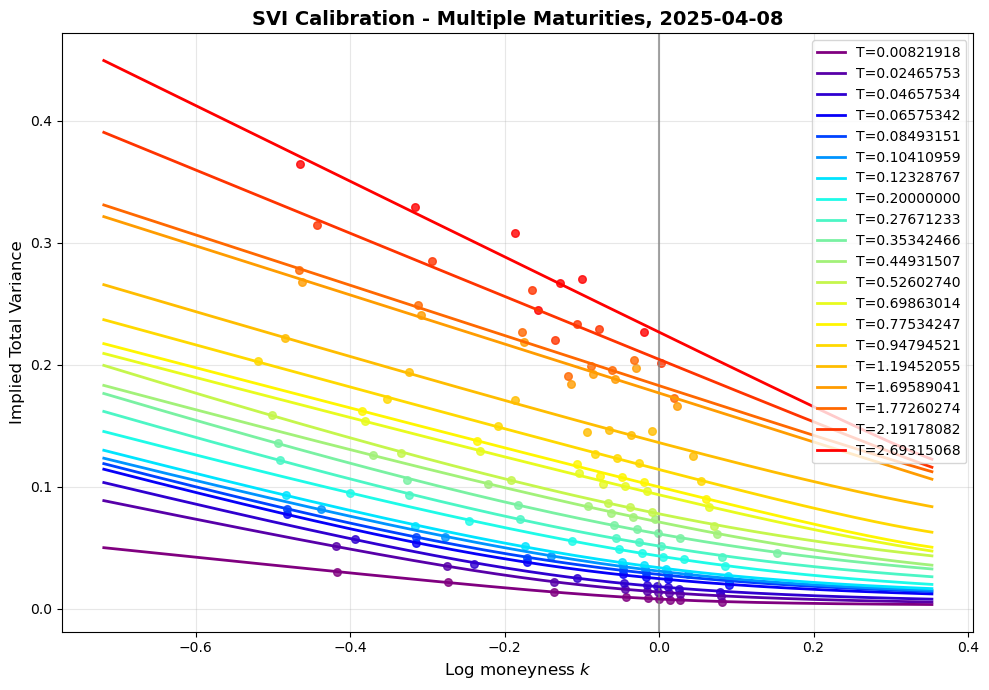

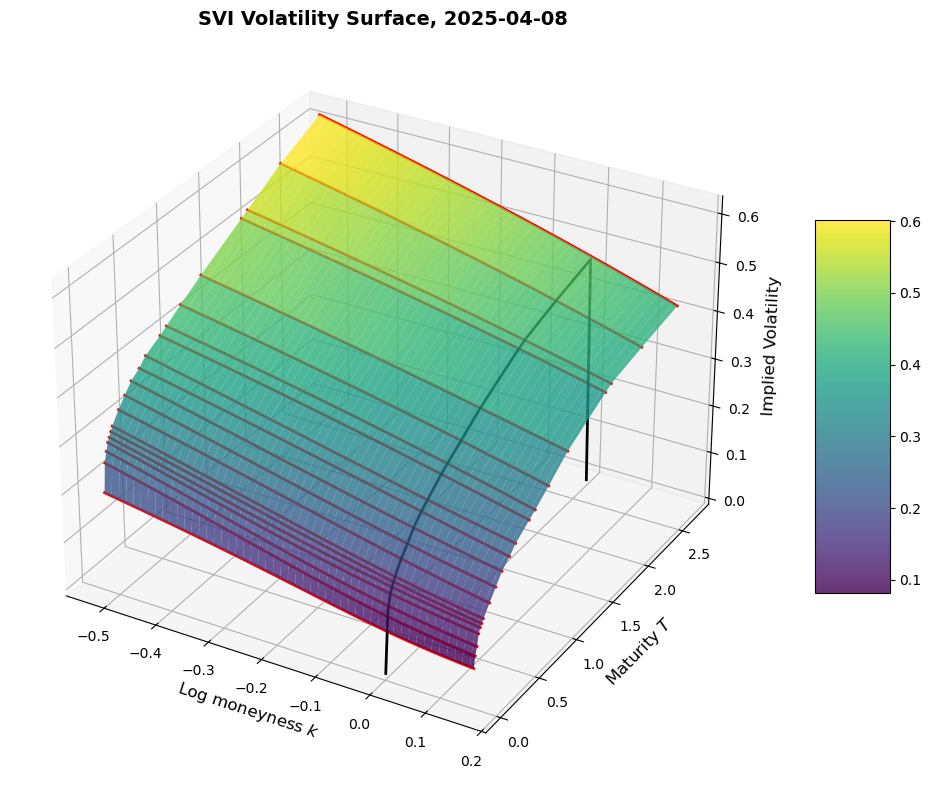


Calibrated SVI Parameters:
                   a         b       rho         m     sigma
Maturity                                                    
0.00821918  0.001830  0.033545 -0.997843 -0.012005  0.194242
0.02465753  0.000008  0.067530 -0.996990 -0.091365  0.279525
0.04657534  0.000004  0.079778 -0.998976 -0.108719  0.316880
0.06575342  0.000001  0.088780 -0.998997 -0.132925  0.388878
0.08493151  0.000004  0.088847 -0.998822 -0.113023  0.414052
0.10410959  0.000047  0.084649 -0.968584 -0.031355  0.392595
0.12328767  0.000009  0.087852 -0.969679 -0.023632  0.405119
0.20000000  0.000013  0.087066 -0.998801  0.060368  0.431653
0.27671233  0.000046  0.098800 -0.998954  0.025626  0.493723
0.35342466  0.000028  0.102590 -0.998935  0.057875  0.536816
0.44931507  0.000352  0.092038 -0.928333  0.256673  0.464089
0.52602740  0.000022  0.106433 -0.998868  0.125288  0.592596
0.69863014  0.006662  0.105260 -0.608751  0.452870  0.309703
0.77534247  0.011752  0.294844  0.432151  0.497148  0.129

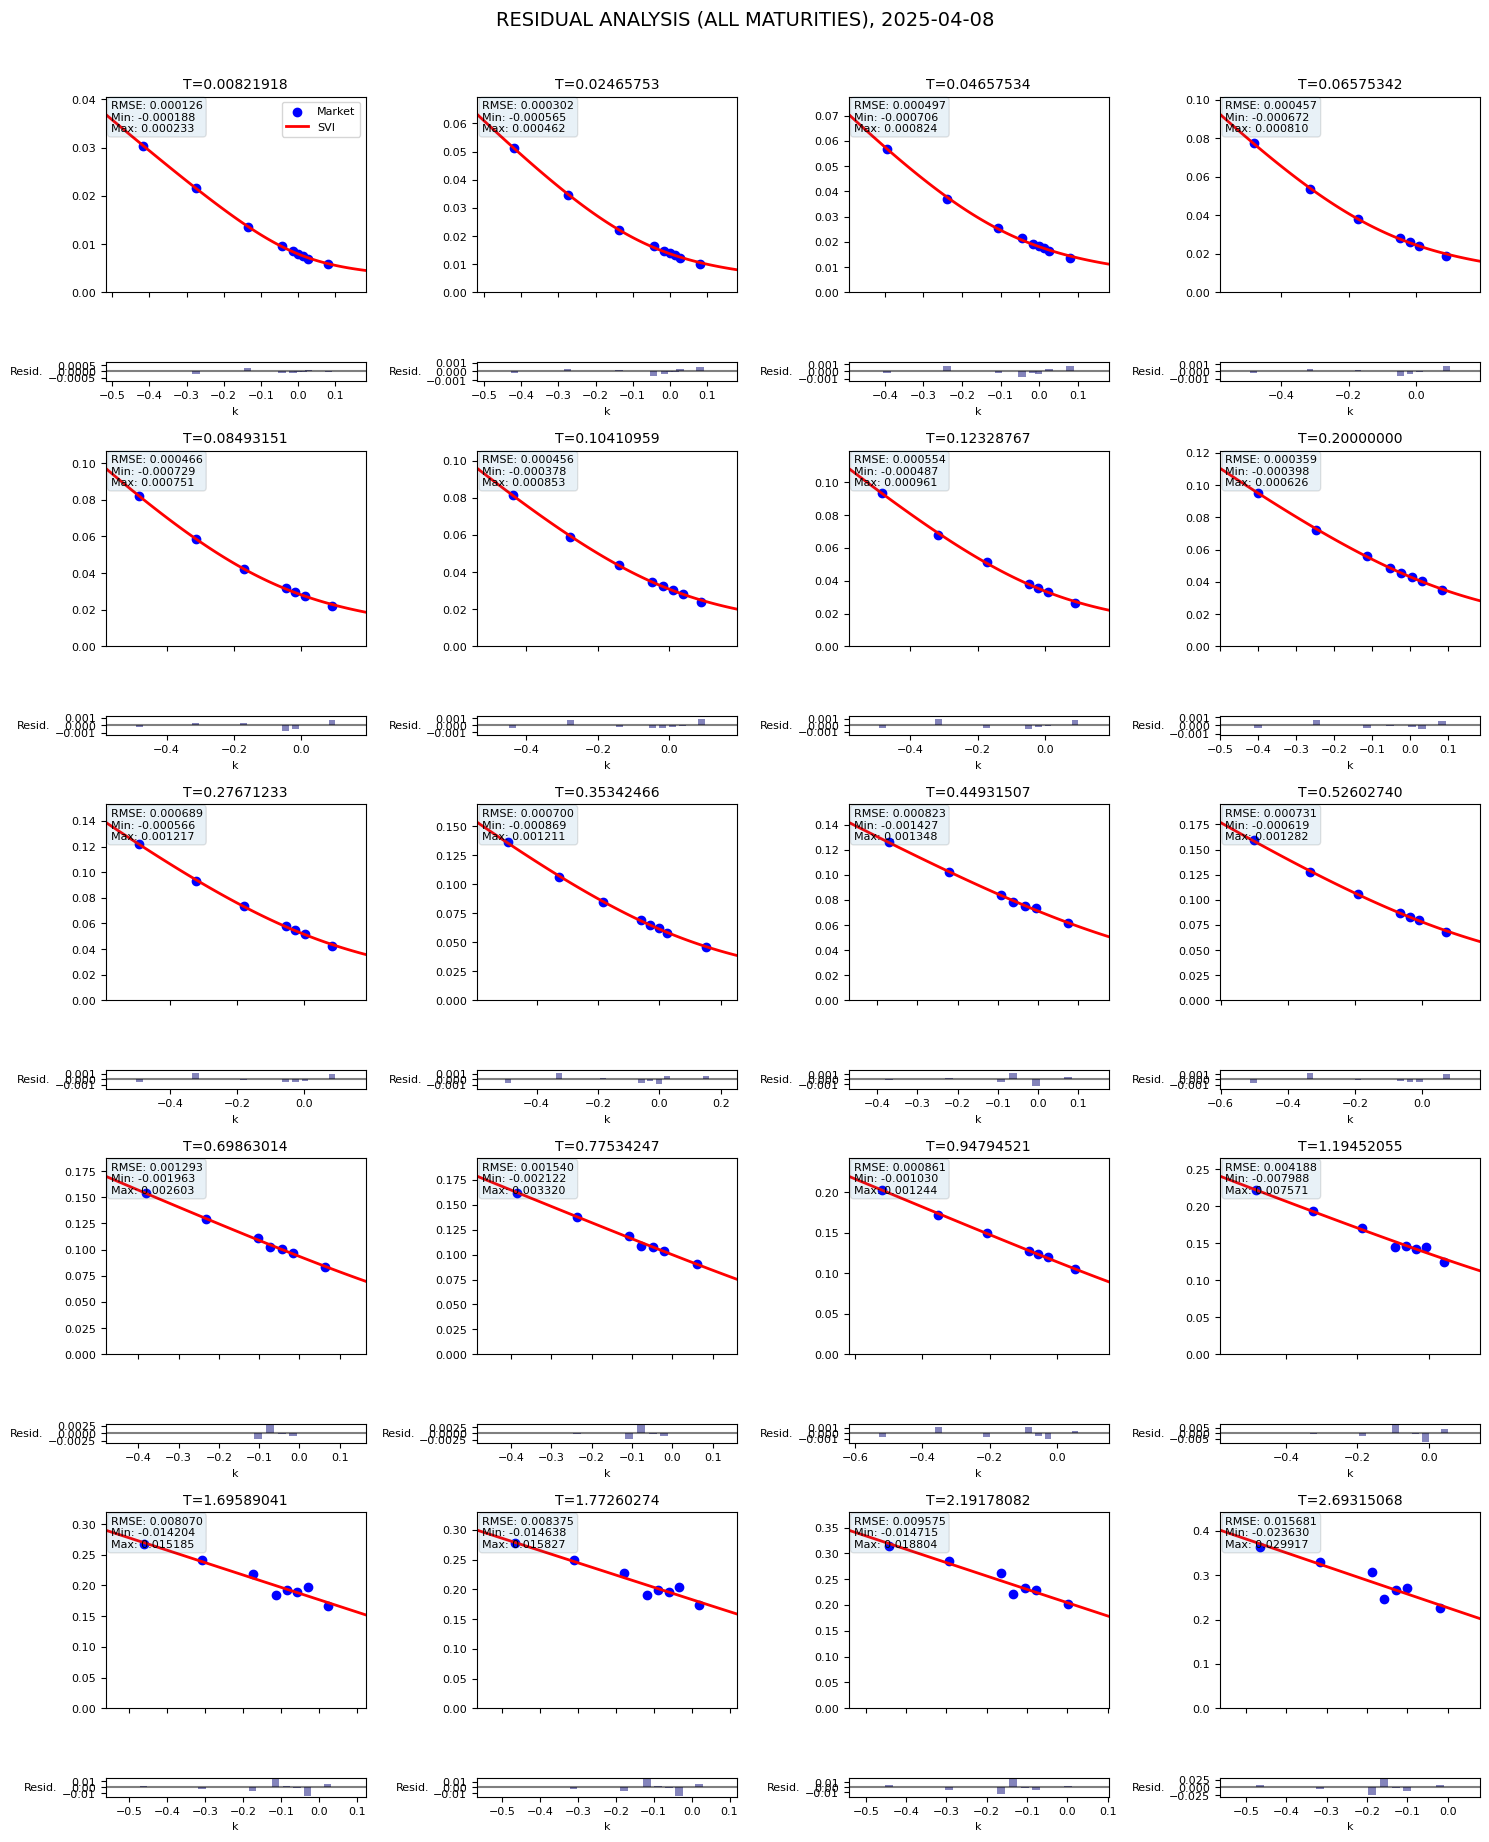

In [6]:
multi_fit_analysis(date='2025-04-08', method='de', epsilon=1e-3, verbose=False, show=True)

Calibrating multiply maturities


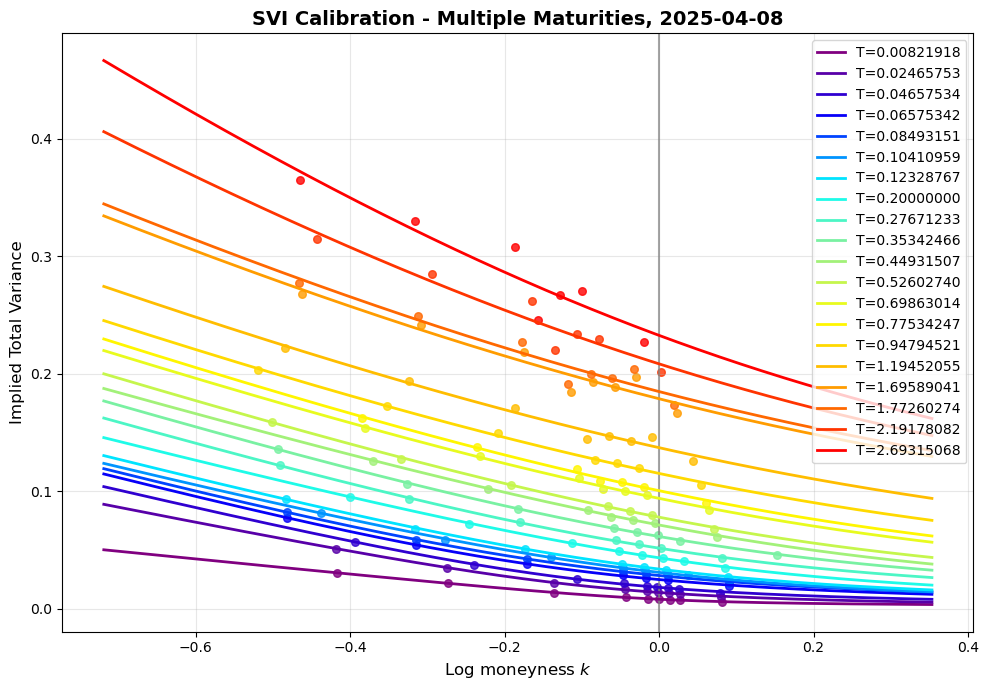

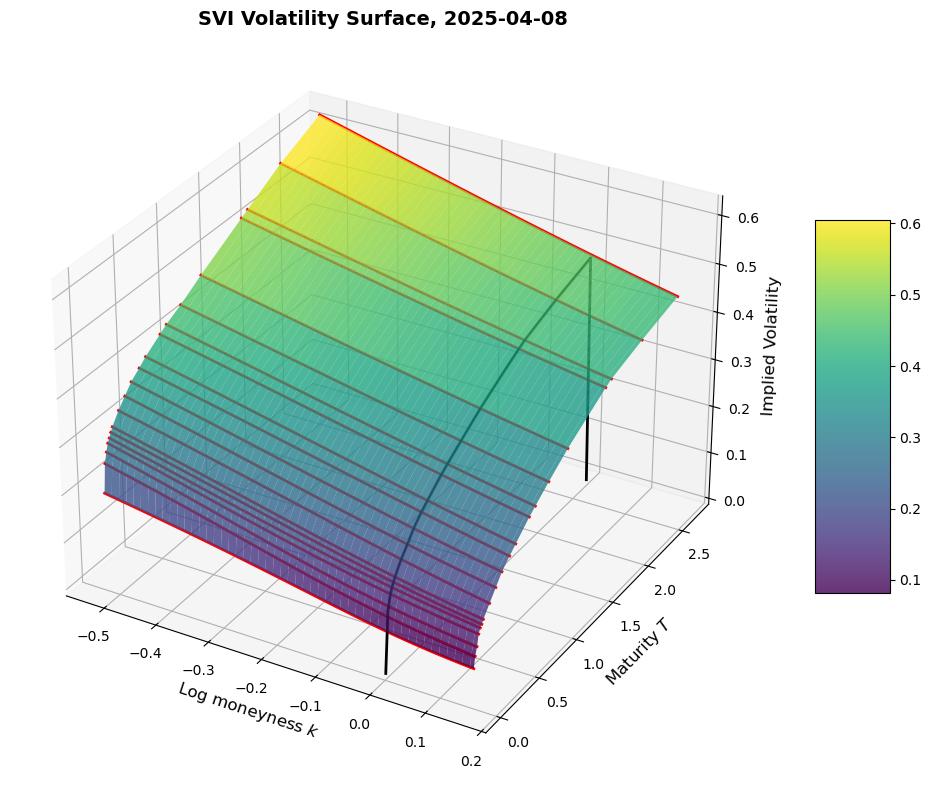


Calibrated SVI Parameters:
                       a         b       rho         m     sigma
Maturity                                                        
0.00821918  1.867457e-03  0.033445 -0.999995 -0.011477  0.193177
0.02465753  3.647084e-10  0.067631 -1.000000 -0.092720  0.280456
0.04657534  4.872498e-09  0.080415 -1.000000 -0.112669  0.317859
0.06575342  5.233945e-12  0.089207 -1.000000 -0.135823  0.389784
0.08493151  7.026953e-11  0.089134 -1.000000 -0.115295  0.414881
0.10410959  3.372903e-10  0.083962 -1.000000 -0.038158  0.403280
0.12328767  4.486135e-11  0.087460 -1.000000 -0.032712  0.415958
0.20000000  5.808404e-10  0.087328 -1.000000  0.057912  0.432976
0.27671233  5.854229e-09  0.099863 -1.000000  0.016630  0.498073
0.35342466  4.102156e-09  0.103196 -1.000000  0.052341  0.539508
0.44931507  1.454410e-09  0.098786 -1.000000  0.149131  0.551200
0.52602740  7.427401e-11  0.107273 -1.000000  0.116756  0.597169
0.69863014  3.913564e-09  0.113356 -1.000000  0.127717  0.6879

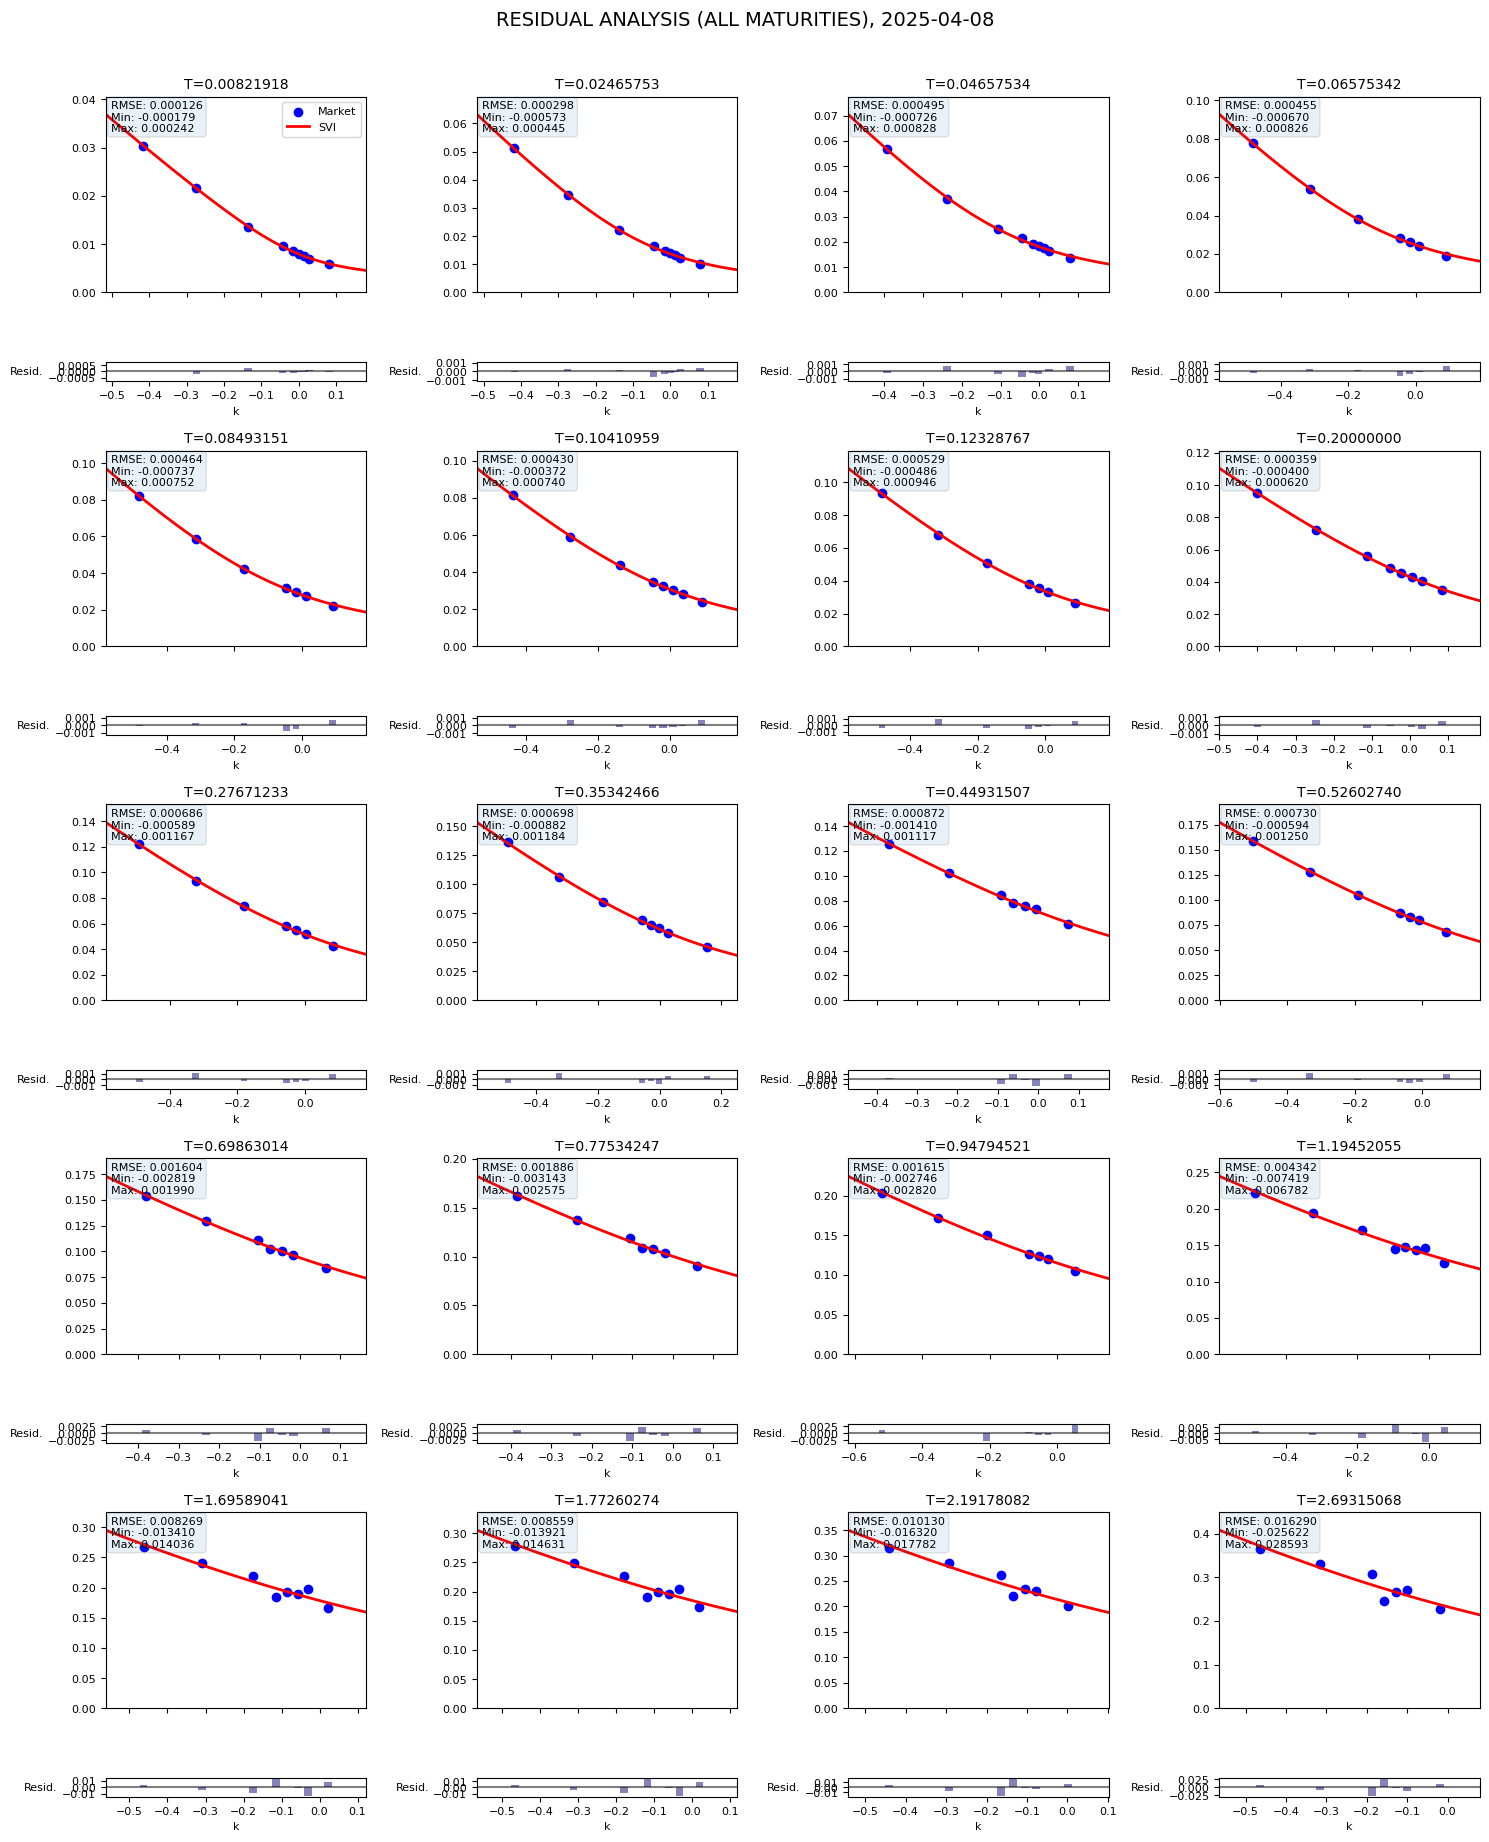

In [7]:
multi_fit_analysis(date='2025-04-08', method='qe', epsilon=1e-3, verbose=False, show=True)